> Introdução à Ciência dos Dados \
> Ciência da Computação – UFV/Florestal


* **Nome:** Luciano Belo de Alcântara Júnior
* **Matrícula:** 3897

# Aula Prática 09
## Aprendizado Supervisionado
**Objetivo:** Utilizar a biblioteca scikit-learn para treinar e testar modelos de aprendizado supervisionado \\
**Pré-requisitos:** Linguagem de programação Python, Linux, estatística \\
**Meta**: Ao final da prática, o aluno será capaz de preparar dados e criar modelos de classificação

In [7]:
### NÃO REMOVA ESSA CÉLULA! ####
!pip --no-cache-dir install --upgrade learntools_dados_ufv

!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p9/weatherHistory.csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for learntools-dados-ufv: filename=learntools_dados_ufv-1.0.9-py3-none-any.whl size=35978 sha256=94e6ef704f57c56cc54d5e37e7a1264f5e1a63ffd4797f4c7179412d0d7b1be2
  Stored in directory: /tmp/pip-ephem-wheel-cache-67fpriyu/wheels/98/7e/ce/0e4d187f24e2a29c7a8e322da422ebb5582d67363b0fdca411
Successfully built learntools-dados-ufv
--2022-07-18 00:46:00--  https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p9/weatherHistory.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16294377 (16M) [text/plain]
Saving to: ‘weatherHistory.csv’

weatherHistory.csv  100%[===================>]  15.54M  --.-KB/s    in 0.1s    

2022-07-18 00:46:01 (

In [8]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from learntools_dados_ufv.core import binder; binder.bind(globals())
from learntools_dados_ufv.ccf425.pratica_9 import *

print("Setup complete.")

Setup complete.


------
## Roteiro

### Ler o conjunto de dados
O conjunto de dados que iremos utilizar é o **iris dataset**, que é um dataset clássico no treinamento em Inteligência Artificial. Os dados estão disponíveis diretamente na biblioteca `scikit-learn`.

In [ ]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns=np.append(iris['feature_names'], ['target']))

# Converte a coluna target para int
iris_df['target'] = iris_df['target'].astype('int64')

### Visualizar os dados

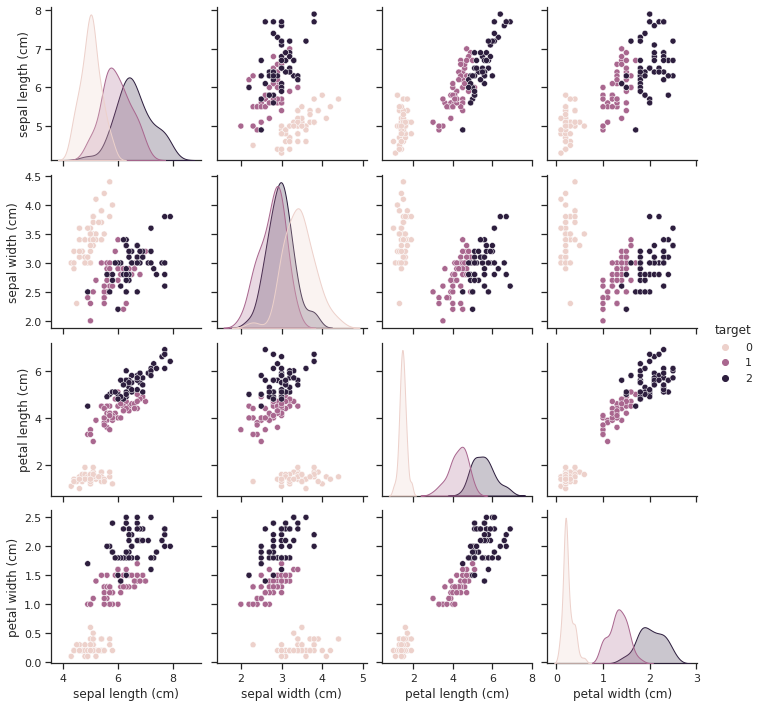

In [ ]:
sns.set(style='ticks')
sns.pairplot(iris_df, hue='target')
plt.show()

### Separar o conjunto de dados em treinamento e testes

In [ ]:
iris_df_X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
iris_df_Y = iris_df['target']

X_train, X_test, Y_train, Y_test = train_test_split(
    iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']],
    iris_df['target'],
    test_size=0.2,
    random_state=0
)

### Aplicar o KNN para treinar um modelo

Além disso, classificar os exemplos de testes

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

knn_Y_predicted = knn.predict(X_test)
knn_accuracy = np.sum(knn_Y_predicted == Y_test) / len(Y_test)

print('Acurácia: {:.2f}%'.format(100 * knn_accuracy))

Acurácia: 96.67%


### Aplicar o SVM para treinar um modelo

... e classificar os exemplos de testes...

In [ ]:
from sklearn import svm

svm = svm.SVC(kernel='linear', probability=True)
svm.fit(X_train, Y_train)

svm_Y_predicted = svm.predict(X_test)
svm_accuracy = np.sum(svm_Y_predicted == Y_test) / len(Y_test)

print('Acurácia: {:.2f}%'.format(100 * svm_accuracy))

Acurácia: 100.00%


#### Calcular a precisão e revogação...

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

print("KNN (precisão, revogação, fscore)")
precision_recall_fscore_support(Y_test, knn_Y_predicted, average=None)

KNN (precisão, revogação, fscore)


(array([1.        , 1.        , 0.85714286]),
 array([1.        , 0.92307692, 1.        ]),
 array([1.        , 0.96      , 0.92307692]),
 array([11, 13,  6]))

In [ ]:
print("SVM (precisão, revogação, fscore)")
precision_recall_fscore_support(Y_test, svm_Y_predicted, average=None)

SVM (precisão, revogação, fscore)


(array([1., 1., 1.]),
 array([1., 1., 1.]),
 array([1., 1., 1.]),
 array([11, 13,  6]))

#### Calcular a Validação Cruzada...

In [ ]:
from sklearn.model_selection import cross_val_score


scores_knn = cross_val_score(knn, iris_df_X, iris_df_Y, cv=5)
print('Acurácia KNN: {:.2f} (± {:.2f})'.format(scores_knn.mean(), scores_knn.std() * 2))

scores_svm = cross_val_score(svm, iris_df_X, iris_df_Y, cv=5)
print('Acurácia SVM: {:.2f} (± {:.2f})'.format(scores_svm.mean(), scores_svm.std() * 2))

Acurácia KNN: 0.97 (± 0.05)
Acurácia SVM: 0.98 (± 0.03)


----
# Atividades

Utilizar o conjunto de dados weatherHistory.csv, que contém o histórico de variáveis relacionadas ao clima da cidade de Szede, Hungria, entre 2006 e 2016.

Utilize técnicas de aprendizado de máquina supervisionado para criar modelos para prever o tipo de precipitação (Precip Type) de acordo com outras variáveis. Teste pelo menos três algoritmos e responda:

## 1. Leia o arquivo `weatherHistory.csv`
Armazene-os nas variável `df`. 

Chame a função `q1.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q1.hint()`

In [10]:
# q1.hint()

df = pd.read_csv('./weatherHistory.csv')

display(df)

q1.check()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


<IPython.core.display.Javascript object>

<span style="color:#33cc33">CORRETO:</span> 



## 2. Divida o conjunto de treinamento (70% das instâncias) e de teste (30% das instâncias)

Utilize uma amostragem aleatória (pesquise um parâmetro que realize isso).

Armazene os dados nas seguintes variáveis:
- `X_train` - Conjunto de atributos de entrada para treinamento
- `Y_train` - Conjunto de saída para treinamento
- `X_test` - Conjunto de atributos de entrada para teste
- `Y_test` - Conjunto de saída para teste

Chame a função `q2.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q2.hint()`

In [19]:
# q2.hint()
# Serão utilizados os dados a partir da column Precip Type, sendo que queremos prever o tipo de precipitação (Precip Type)

df.dropna(inplace=True)

X = df[["Temperature (C)","Apparent Temperature (C)",	"Humidity", "Wind Speed (km/h)",	"Wind Bearing (degrees)", "Visibility (km)", "Pressure (millibars)"	]]
Y = df["Precip Type"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=(0.3),train_size=(0.7))

q2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">CORRETO:</span> 



## 3. Faça uma análise simples da distribuição dos dados de Precipitação
Analise se os dados seguem uma distribuição normal ou não, se é contínuo ou não, etc. Talvez com 1 ou 2 gráficos você consiga tirar toda a informação necessária.

Tente extrair as informações fundamentais para **escolher um modelo de aprendizado de máquina supervisionado** ideal.

Essa questão não possui verificação automática mas você pode pedir dicas com `q3.hint()`

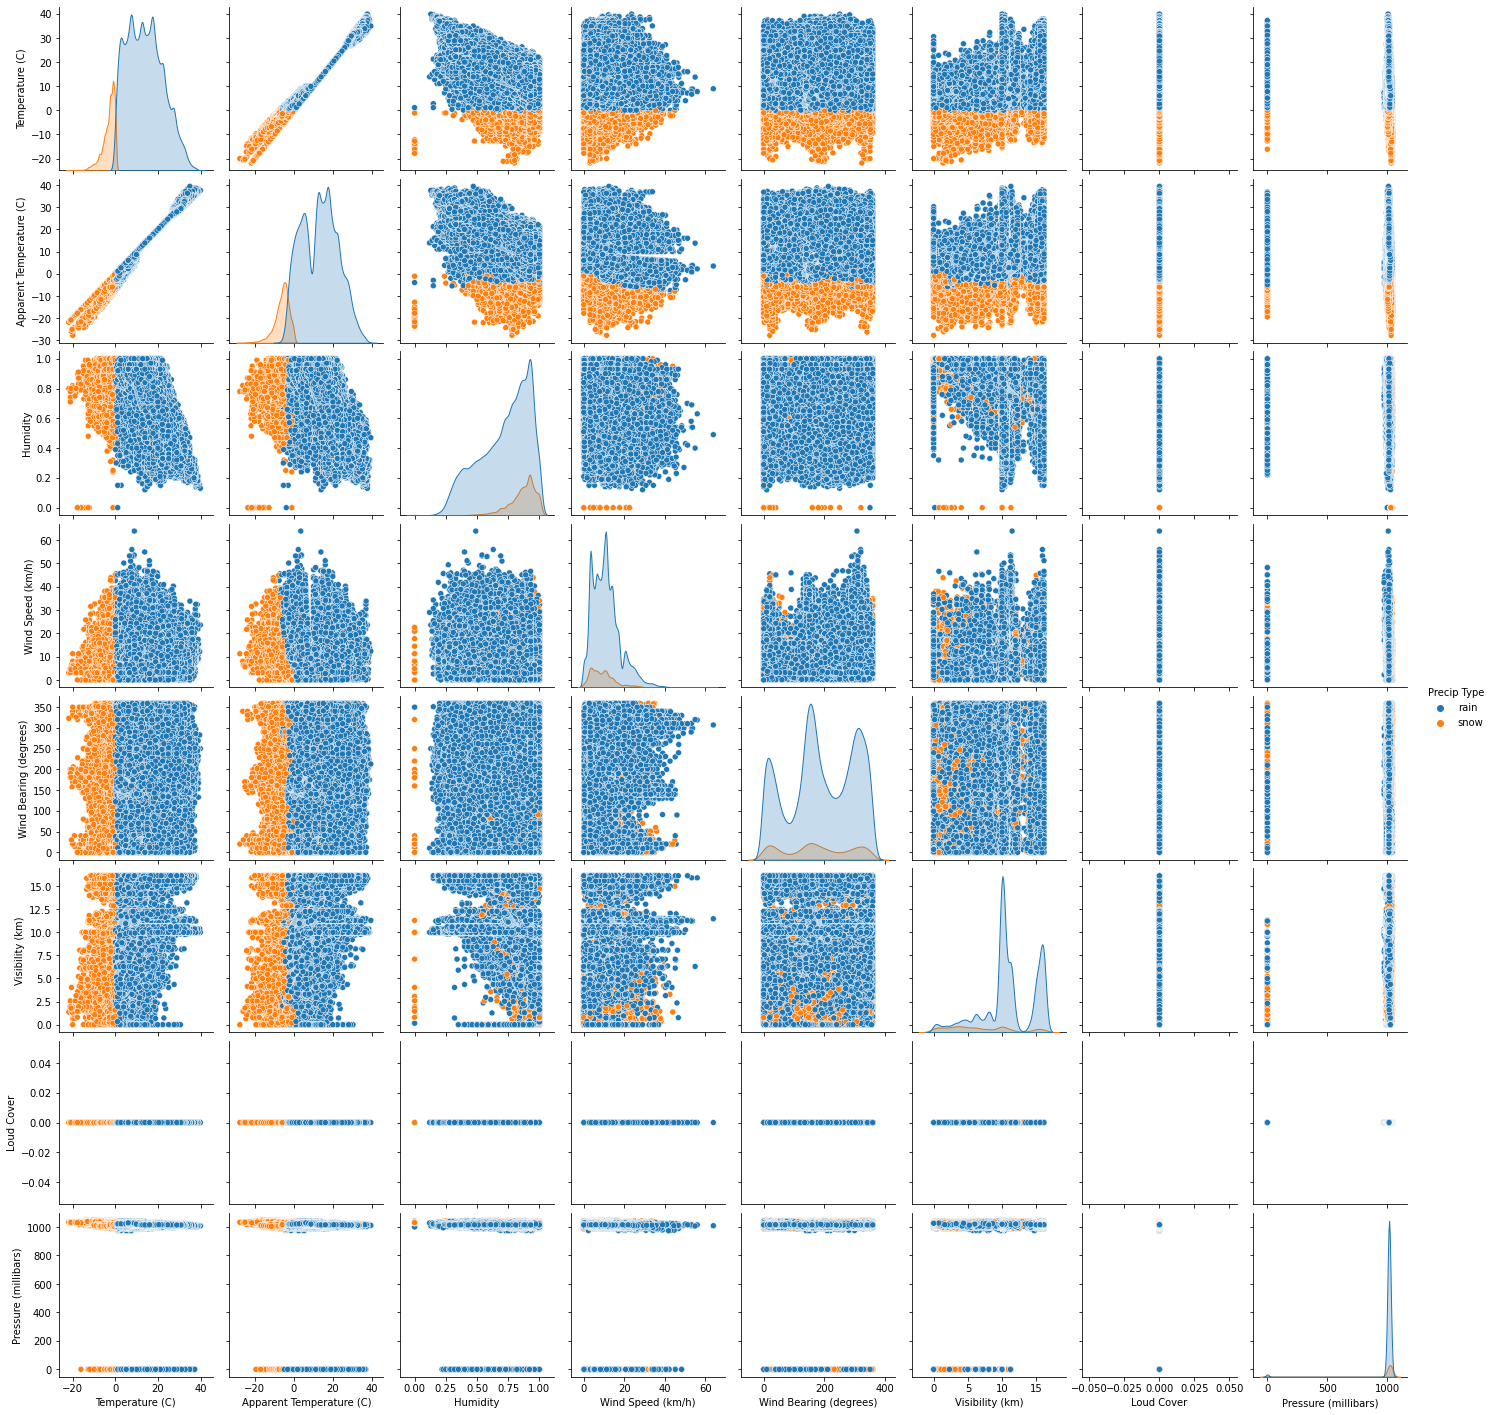

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Dica 1:</span> Faça um plot de distribuição com a coluna de interesse (Y).
(Para outra dica, chame `.hint(2)`)

In [20]:
# Resposta da 3

sns.pairplot(df, hue='Precip Type')
plt.show()

q3.hint()

## 4. Utilize técnicas de aprendizado de máquina **supervisionado** para prever o tipo de precipitação
Utilize técnicas de aprendizado de máquina supervisionado para criar modelos para prever o tipo de precipitação (Precip Type) de acordo com outras variáveis. 

Analise o conjunto de dadoTeste pelo menos três algoritmos. Escolha os que você julgar mais adequado e justifique porque o escolheu (uma frase curta, não precisa se aprofundar... tente aplicar os conhecimentos teóricos sobre cada modelo)


É esperado que você preencha uma célula de markdown descrevendo o método e o porquê o escolheu, e uma célula de código que faça o treinamento (`fit`) do modelo.

Essa questão não possui verificação automática mas você pode pedir dicas com `q4.hint()`

In [2]:
# q4.hint()

### Resposta da 4: - Modelo 1

**Modelo:** Árvores de Decisão

**Justificativa:**  O custo de utilização da árvore para prever dados diminui conforme aumenta-se o número de dados e funciona tanto para dados categóricos quanto para numéricos.

In [21]:
# Resposta da 4: - Modelo 1
# Faça o modelo do primeiro modelo da 4. aqui!

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

decision_tree_y_predicted_type = decision_tree.predict(X_test)
decision_tree_accuracy = np.sum(decision_tree_y_predicted_type == Y_test) / len(Y_test)

print('Acurácia: {:.2f}%'.format(100 * decision_tree_accuracy))

Acurácia: 100.00%


### Resposta da 4: - Modelo 2

**Modelo:** KNN

**Justificativa:** Simples de utilizar e aplicável em diversos âmbitos

In [23]:
# Resposta da 4: - Modelo 2
# Faça o modelo do segundo modelo da 4. aqui!

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

knn_Y_predicted = knn.predict(X_test)
knn_accuracy = np.sum(knn_Y_predicted == Y_test) / len(Y_test)

print('Acurácia: {:.2f}%'.format(100 * knn_accuracy))

Acurácia: 97.98%


### Resposta da 4: - Modelo 3

**Modelo:** SVM

**Justificativa:** É usado para desafios de classificação ou regressão, sendo que seu foco maior é no treinamento e classificação de um dataset.

In [24]:
# Resposta da 4: - Modelo 3
# Faça o modelo do terceiro modelo da 4. aqui!

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, Y_train).predict(X_test)

gnb_acu = np.sum(y_pred == Y_test) / len(Y_test)

print('Acurácia: {:.2f}%'.format(100 * gnb_acu)) 

Acurácia: 93.99%


## 5. Calcule estatísticas para cada algoritmo escolhido
Calcule a acurácia, precisão e revocação para cada rótulo (tipo de precipitação) para cada algoritmo testado.

É esperado que você preencha a tabela markdown abaixo com os resultados.

Essa questão não possui verificação automática mas você pode pedir dicas com `q5.hint()`

In [26]:
from sklearn import metrics

### Algoritmo 1

**Nome:** Árvore de Decisão

**Resultados:**

| Label                  	| Acurácia 	| Precisão 	| Revogação 	|
|------------------------	|----------	|----------	|-----------	|
| {{Tipo Precip Type 1}} 	|          	|          	|           	|
| {{Tipo Precip Type 2}} 	|          	|          	|           	|
| {{Tipo Precip Type N}} 	|  100.00% 	|    1.00 	|    1.00    	|

In [29]:
# Insira o código para calcular estatísticas do seu modelo/algoritmo 1. 

print(metrics.classification_report(Y_test, decision_tree_y_predicted_type))

q5.hint()

              precision    recall  f1-score   support

        rain       1.00      1.00      1.00     25549
        snow       1.00      1.00      1.00      3232

    accuracy                           1.00     28781
   macro avg       1.00      1.00      1.00     28781
weighted avg       1.00      1.00      1.00     28781



<IPython.core.display.Javascript object>

<span style="color:#3366cc">Dica 1:</span> Visite o roteiro para ver como é calculado a acurácia, precisão e revogação.
(Para outra dica, chame `.hint(2)`)

### Algoritmo 2

**Nome:** KNN

**Resultados:**

| Label                  	| Acurácia 	| Precisão 	| Revogação 	|
|------------------------	|----------	|----------	|-----------	|
| {{Tipo Precip Type 1}} 	|          	|          	|           	|
| {{Tipo Precip Type 2}} 	|          	|          	|           	|
| {{Tipo Precip Type N}} 	|  97.98%  	|    0.99  	|     0.99   	|

In [27]:
# Insira o código para calcular estatísticas do seu modelo/algoritmo 2. 

print(metrics.classification_report(Y_test, knn_Y_predicted))

q5.hint()

              precision    recall  f1-score   support

        rain       0.99      0.99      0.99     25549
        snow       0.92      0.90      0.91      3232

    accuracy                           0.98     28781
   macro avg       0.95      0.94      0.95     28781
weighted avg       0.98      0.98      0.98     28781



<IPython.core.display.Javascript object>

<span style="color:#3366cc">Dica 1:</span> Visite o roteiro para ver como é calculado a acurácia, precisão e revogação.
(Para outra dica, chame `.hint(2)`)

### Algoritmo 3

**Nome:** SVM

**Resultados:**

| Label                  	| Acurácia 	| Precisão 	| Revogação 	|
|------------------------	|----------	|----------	|-----------	|
| {{Tipo Precip Type 1}} 	|          	|          	|           	|
| {{Tipo Precip Type 2}} 	|          	|          	|           	|
| {{Tipo Precip Type N}} 	|  93.99%  	|    0.99  	|    0.99    	|

In [28]:
# Insira o código para calcular estatísticas do seu modelo/algoritmo 3. 

print(metrics.classification_report(Y_test, knn_Y_predicted))

q5.hint()

              precision    recall  f1-score   support

        rain       0.99      0.99      0.99     25549
        snow       0.92      0.90      0.91      3232

    accuracy                           0.98     28781
   macro avg       0.95      0.94      0.95     28781
weighted avg       0.98      0.98      0.98     28781



<IPython.core.display.Javascript object>

<span style="color:#3366cc">Dica 1:</span> Visite o roteiro para ver como é calculado a acurácia, precisão e revogação.
(Para outra dica, chame `.hint(2)`)

## 6.  É possível melhorar o algoritmo se forem selecionados alguns atributos em particular, ao invés de utilizar todos?
Descreva sua resposta para cada um dos algoritmos. Utilize evidências empíricas, se achar conveniente.

Essa questão não possui verificação automática mas você pode pedir dicas com `q6.hint()`

{{ Resposta da 6. }}

O algoritmo de `Árvores de Decisão` não precisa de melhoria já que tem acurária de 100%. 

In [ ]:
q6.hint()

updated_models = ...

## 7. Você percebeu alguma diferença no tempo de processamento dos algoritmos? Qual foi o mais lento? E qual foi o mais rápido?
Descreva sua resposta para cada um dos algoritmos. Utilize evidências empíricas, se achar conveniente.

Essa questão não possui verificação automática mas você pode pedir dicas com `q7.hint()`

{{ Resposta da 7. }}

Primeiramente percebe-se que o algoritmo` Árvores de Decisão` teve o melhor enquanto o `SVM` teve o pior. Com relação ao tempo de processamento o algoritmo `Árvores de Decisão` foi o mais rápido e os demais tiveram tempo de execução bem próximos

## 8. Mostre a matriz de confusão para os resultados.
Pesquise como fazer uma matriz de confusão. Descreva sua resposta para cada um dos algoritmos. Evidencie explicitamente o código utilizado, usando bibliotecas ou não.

Essa questão não possui verificação automática mas você pode pedir dicas com `q8.hint()`

{{ Resposta da 8. }}

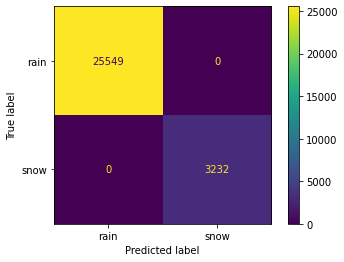

In [30]:
# q8.hint()

# Árvores de Decisão

cm = metrics.confusion_matrix(Y_test, decision_tree_y_predicted_type, labels=decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree.classes_)
disp.plot()
plt.show() 

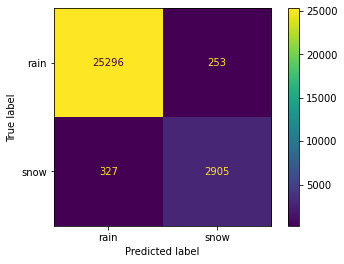

In [31]:
# KNN

cm = metrics.confusion_matrix(Y_test, knn_Y_predicted, labels=knn.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

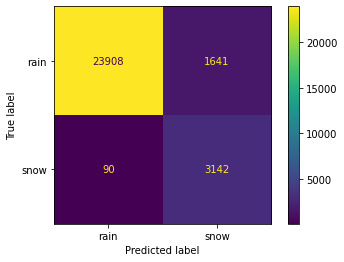

In [32]:
# SVM
cm = metrics.confusion_matrix(Y_test, y_pred, labels=gnb.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()